<a href="https://colab.research.google.com/github/asutoshsabat91/Customer_Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


***Load Dataset***

In [ ]:
df=pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


***Data Manipulation***

In [ ]:

customer_5 = df.iloc[:, 4]
customer_15 = df.iloc[:, 14]
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
customer_333 = df.sample(n=333)
churn_counts = df['Churn'].value_counts()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Data Visualization***

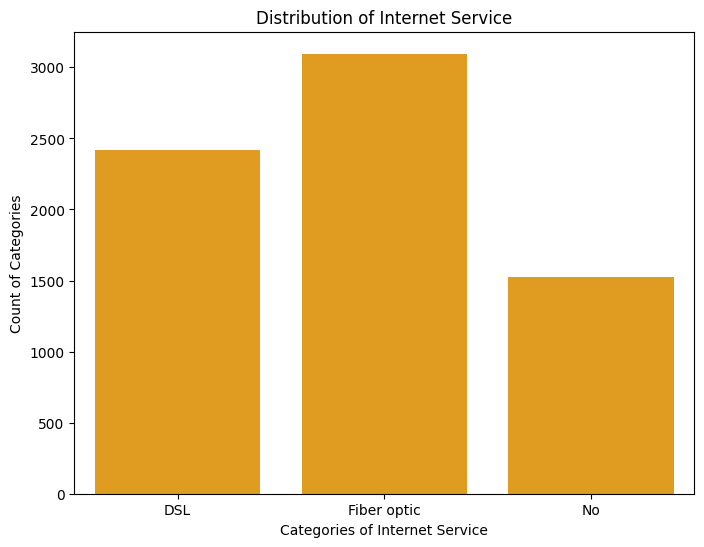

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

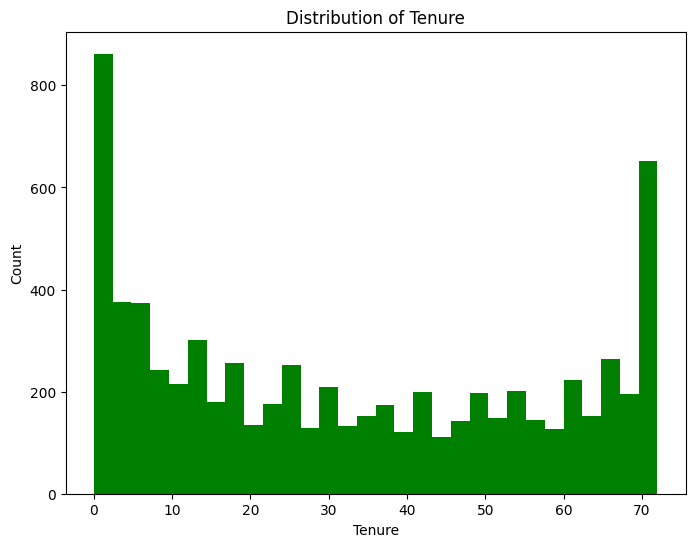

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'],bins=30, color='green')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()


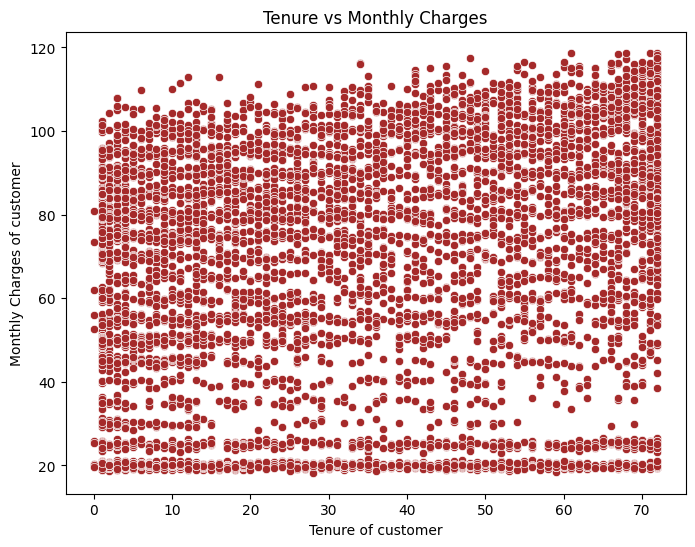

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


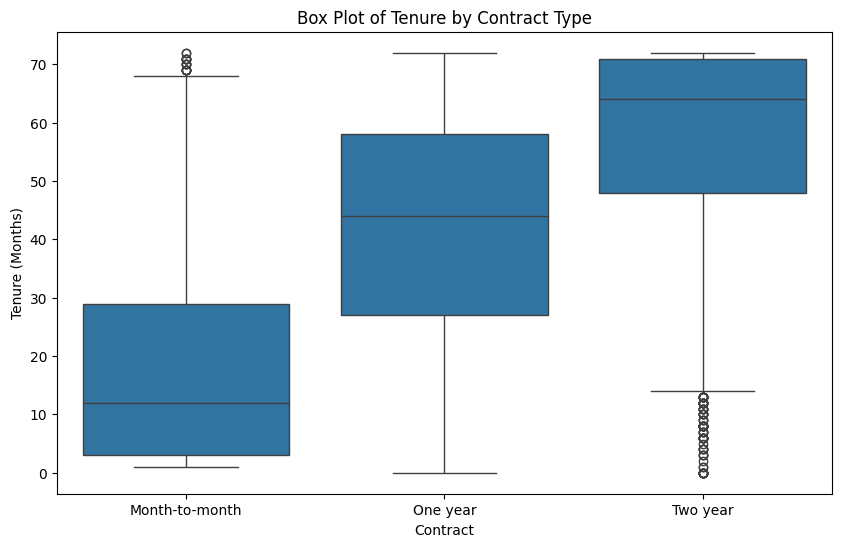

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract')
plt.ylabel('Tenure (Months)')
plt.title('Box Plot of Tenure by Contract Type')
plt.show()

***One Hot Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['customerID']=le.fit_transform(df['customerID'])
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])
df['Churn']=le.fit_transform(df['Churn'])
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


***Feature Selection***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if((df[col].dtype!='object')& (col!='tenure')):
    col_list.append(col)

X= df[col_list]
vif_data= pd.DataFrame()
vif_data['feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0         customerID   3.556633
1             gender   1.940239
2      SeniorCitizen   1.365930
3            Partner   2.707671
4         Dependents   1.951426
5       PhoneService  14.532355
6      MultipleLines   2.640093
7    InternetService   4.367574
8     OnlineSecurity   2.242366
9       OnlineBackup   2.361615
10  DeviceProtection   2.607000
11       TechSupport   2.398659
12       StreamingTV   3.231167
13   StreamingMovies   3.254284
14          Contract   3.067058
15  PaperlessBilling   2.857840
16     PaymentMethod   2.992406
17    MonthlyCharges  15.790019
18      TotalCharges   4.272374
19             Churn   1.754247


In [ ]:
df.drop(columns=['PhoneService','InternetService','StreamingTV','StreamingMovies'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,1,0,2,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,0,2,0,2,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,0,2,2,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,1,2,0,2,2,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,2,2,0,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,2,0,2,2,0,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,1,2,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,2,0,0,0,0,0,1,3,74.40,2660,1


***Linear Regression***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['tenure']]
y = df['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


error = y_test - y_pred
print("\nError in prediction:")
print(error.head())

Root Mean Squared Error: 29.07936015646814

Error in prediction:
185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
Name: MonthlyCharges, dtype: float64


***Logistic Regression***

Simple Logistic Regression (Churn ~ MonthlyCharges):
Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy Score: 0.7287104622871047

Multiple Logistic Regression (Churn ~ tenure + MonthlyCharges):
Confusion Matrix:
 [[944  92]
 [193 180]]
Accuracy Score: 0.7977288857345636


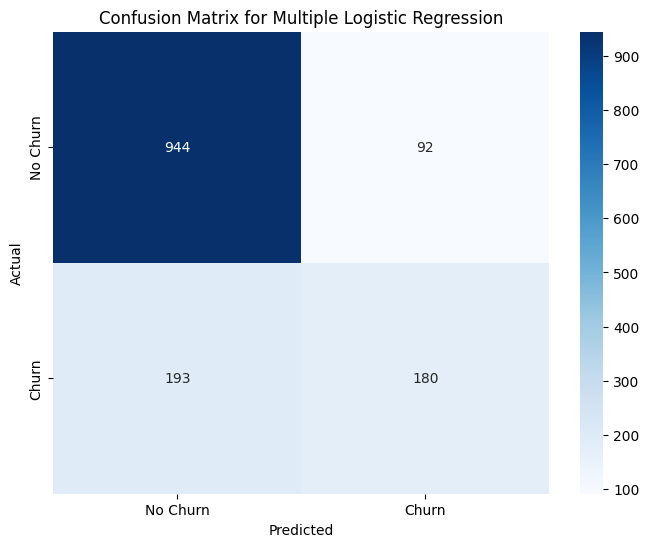

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


X_simple = df[['MonthlyCharges']]
y_simple = df['Churn']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.35, random_state=42)


model_simple = LogisticRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)


conf_matrix_simple = confusion_matrix(y_test_simple, y_pred_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

print("Simple Logistic Regression (Churn ~ MonthlyCharges):")
print("Confusion Matrix:\n", conf_matrix_simple)
print("Accuracy Score:", accuracy_simple)


X_multiple = df[['tenure', 'MonthlyCharges']]
y_multiple = df['Churn']


X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.20, random_state=42)


model_multiple = LogisticRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)
y_pred_multiple = model_multiple.predict(X_test_multiple)


conf_matrix_multiple = confusion_matrix(y_test_multiple, y_pred_multiple)
accuracy_multiple = accuracy_score(y_test_multiple, y_pred_multiple)

print("\nMultiple Logistic Regression (Churn ~ tenure + MonthlyCharges):")
print("Confusion Matrix:\n", conf_matrix_multiple)
print("Accuracy Score:", accuracy_multiple)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_multiple, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multiple Logistic Regression')
plt.show()

***Decision Tree***

Decision Tree (Churn ~ tenure):
Confusion Matrix:
 [[951  85]
 [257 116]]
Accuracy Score: 0.7572746628814763


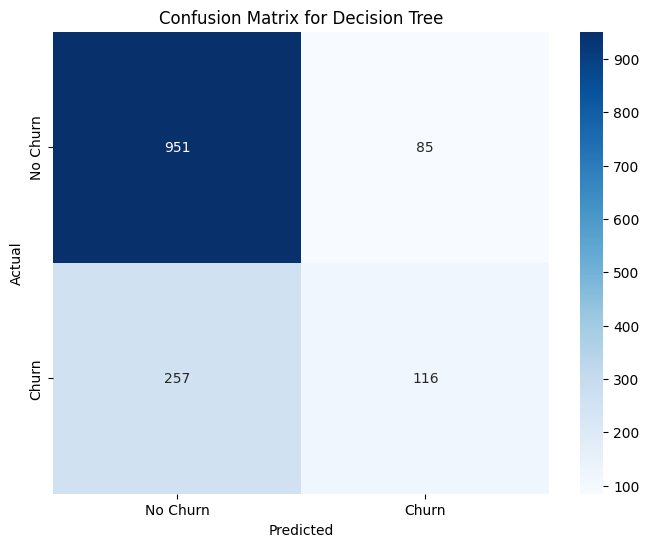

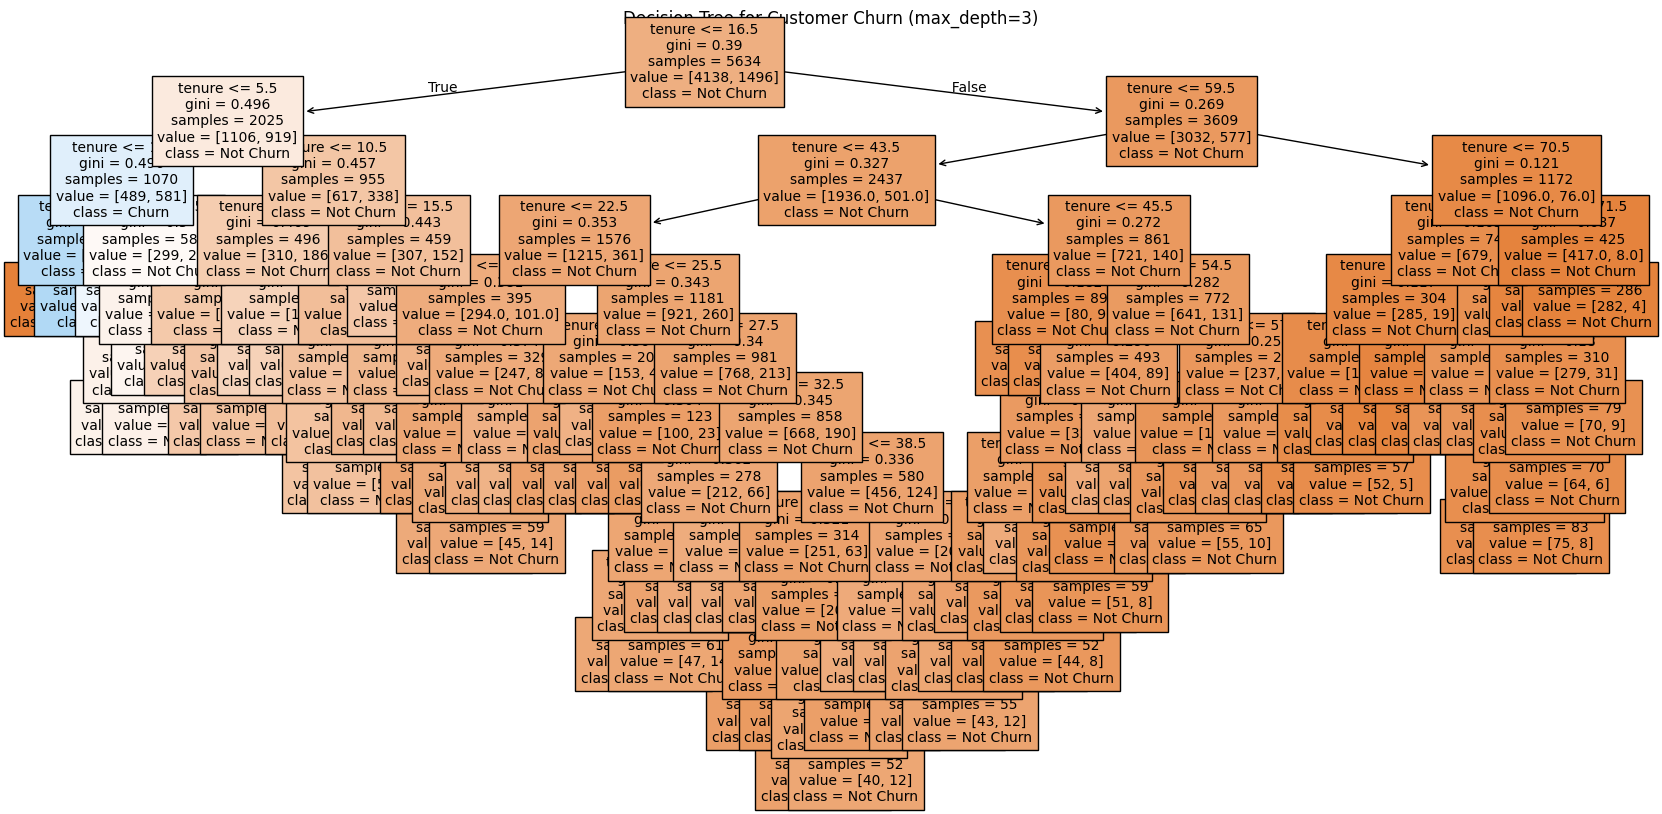

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


X_dt = df[['tenure']]
y_dt = df['Churn']
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.20, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_model.predict(X_test_dt)

conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

print("Decision Tree (Churn ~ tenure):")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy Score:", accuracy_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_dt.columns.tolist(),
          class_names=['Not Churn', 'Churn'], # Assuming 0 is Not Churn and 1 is Churn
          filled=True,
          fontsize=10)
plt.title("Decision Tree for Customer Churn (max_depth=3)")
plt.show()

***Random Forest***

Random Forest (Churn ~ tenure + MonthlyCharges):
Confusion Matrix:
 [[1341  198]
 [ 308  266]]
Accuracy Score: 0.7605300520586843


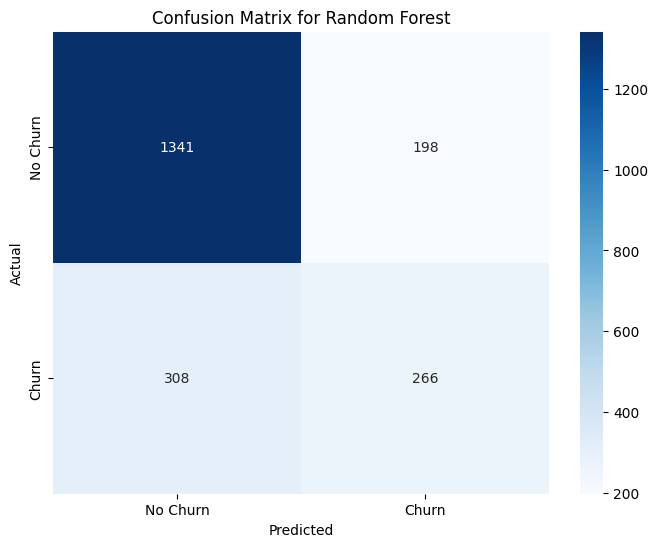

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_rf = df[['tenure', 'MonthlyCharges']]
y_rf = df['Churn']


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)


conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

print("Random Forest (Churn ~ tenure + MonthlyCharges):")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy Score:", accuracy_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()
